# Sparks Foundation - Graduate Rotational Internship (GRIP)
January 2023 Batch, Name-Ramya.S

# Task -2 Prediction using Unsupervised ML

From ‘Iris’ dataset, predicting the optimum number of clusters
and represent it visually.

# Loading dataset

Importing necessary library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [20]:
# Load the iris dataset

iris = datasets.load_iris()
DATA = pd.DataFrame(iris.data, columns = iris.feature_names)
DATA.head(10)# See the first 10 rows
     

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [6]:
DATA.shape

(150, 4)

In [7]:

DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
DATA.describe

<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [9]:
DATA.isnull().sum()
#checkinh for null values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [11]:
x = DATA.iloc[:,[0,3]].values
     

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


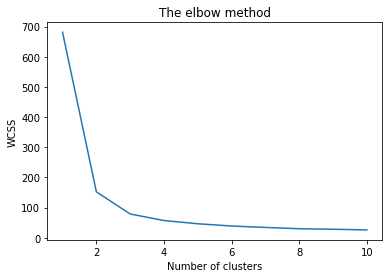

In [22]:
# Finding the optimum number of clusters for k-means classification

x = DATA.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

In [24]:
# Develo[ing k-means  model
Kmeans = KMeans(n_clusters = 3 , init='k-means++', random_state = 0)
Kmeans.fit(x)
y_kmeans = Kmeans.predict(x)
     

In [25]:

y_kmeans
     

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Text(0.5, 1.0, 'Petal Length vs Petal Width')

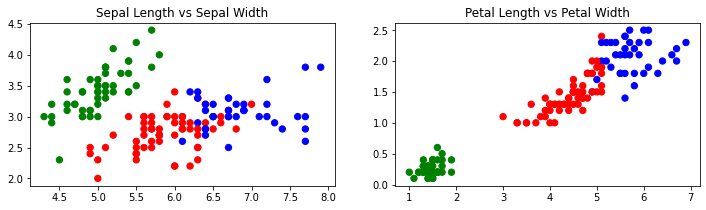

In [26]:

# visualisation of feature pattern 
plt.figure(figsize=(12,3)) # set figure size
colors = np.array(['red', 'green', 'blue']) # colour for each species
plt.subplot(1, 2, 1) 
plt.scatter(DATA['sepal length (cm)'], DATA['sepal width (cm)'], c=colors[y_kmeans], s=40) # scatter plot for sepal lengh to sepal width
plt.title('Sepal Length vs Sepal Width')
plt.subplot(1,2,2)
plt.scatter(DATA['petal length (cm)'], DATA['petal width (cm)'], c=colors[y_kmeans], s=40) # scatter plot for petal lenght to petal width
plt.title('Petal Length vs Petal Width')

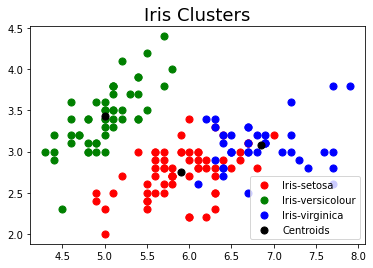

In [27]:
#visulaize results
plt.scatter(x[y_kmeans==0, 0],x[y_predict==0, 1], s=50, c='red',label="Iris-setosa")
plt.scatter(x[y_kmeans==1,0],x[y_predict==1,1], s=50, c='green',label="Iris-versicolour")
plt.scatter(x[y_kmeans==2,0],x[y_predict==2,1], s=50, c='blue',label="Iris-virginica")
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1],s=50,c='black',label='Centroids')
plt.title('Iris Clusters',fontsize=18)
plt.legend()

This is the K-Means  optimum model

